In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [11]:
len(train_data[1])

189

In [13]:
train_data.shape

(25000,)

In [17]:
train_labels.shape

(25000,)

In [23]:
imdb.get_word_index()['nice']

324

In [25]:
len(imdb.get_word_index())

88584

In [27]:
word_index = imdb.get_word_index()

In [29]:
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])

In [31]:
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [33]:
decoded_review=" ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [35]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [39]:
reverse_word_index.get(2289)

'woody'

In [55]:
import numpy as np
def vectorize_sequence(sequences,dimension=10000):
    result = np.zeros((len(sequences),dimension))
    for i , sequences in enumerate(sequences):
        for j in sequences:
            result[i,j]=1
    return result
    

In [61]:
x_train=vectorize_sequence(train_data)
x_test=vectorize_sequence(test_data)

In [ ]:
# # import numpy as np
# # def vectorize_sequences(sequences, dimension=10000):
# #     results = np.zeros((len(sequences), dimension))
# #     for i, sequence in enumerate(sequences):
# #         for j in sequence:
# #             results[i, j] = 1.
# #     return results
# x_train = vectorize_sequences(train_data)
# x_test = vectorize_sequences(test_data)

In [79]:
x_train[10].sum()

y_train=np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [81]:
# y_train = np.asarray(train_labels).astype("float32")
# y_test = np.asarray(test_labels).astype("float32")
y_train.shape ,  y_test.shape

((25000,), (25000,))

In [83]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
                            layers.Dense(16, activation="relu"),
                            layers.Dense(16, activation="relu"),
                            layers.Dense(1, activation="sigmoid")
                        ])

In [85]:
model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])

In [87]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [89]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 181ms/step - accuracy: 0.7821 - loss: 0.5279 - val_accuracy: 0.8599 - val_loss: 0.4032
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8927 - loss: 0.3281 - val_accuracy: 0.8801 - val_loss: 0.3228
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9191 - loss: 0.2444 - val_accuracy: 0.8670 - val_loss: 0.3245
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9366 - loss: 0.1945 - val_accuracy: 0.8884 - val_loss: 0.2785
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9481 - loss: 0.1627 - val_accuracy: 0.8850 - val_loss: 0.2822
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9575 - loss: 0.1353 - val_accuracy: 0.8827 - val_loss: 0.2898
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9657 - loss: 0.1149 - val_accuracy: 0.8785 - val_loss: 0.3073
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9706 - loss: 0.0983 - val_accuracy: 0.8802 - 

In [91]:
history_dict = history.history

In [95]:
# history_dict

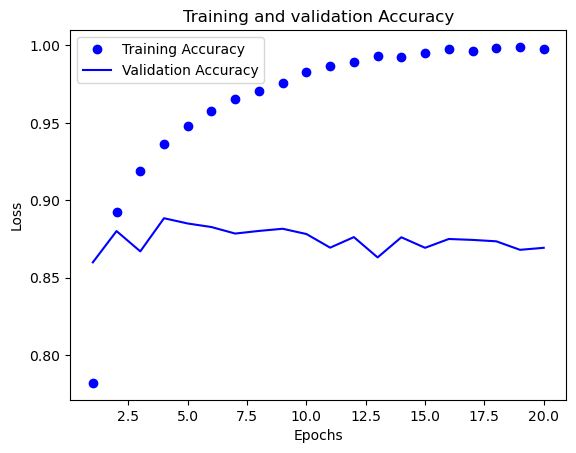

In [97]:
import matplotlib.pyplot as plt

loss_values = history_dict["accuracy"]
val_loss_values = history_dict["val_accuracy"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training Accuracy")
plt.plot(epochs, val_loss_values, "b", label="Validation Accuracy")
plt.title("Training and validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

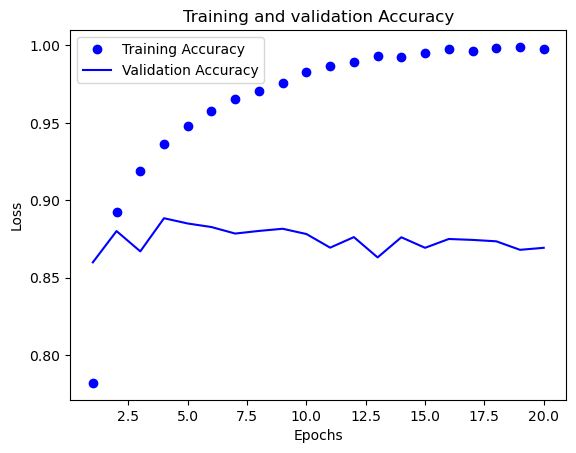

In [103]:
import matplotlib.pyplot as plt

loss_values = history_dict["accuracy"]
val_loss_values = history_dict["val_accuracy"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training Accuracy")
plt.plot(epochs, val_loss_values, "b", label="Validation Accuracy")
plt.title("Training and validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

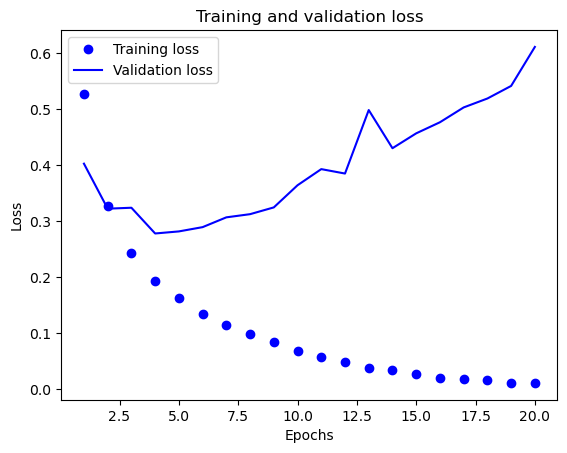

In [105]:
import matplotlib.pyplot as plt

loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()